# Logistic Regression

### Setup

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import random

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [2]:
#setting a random seed for reproducibility
random.seed(4)

In [3]:
#getting the data
with open('realAccountData.json', 'r') as f:
            realData = json.load(f)
with open('fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData #note that the data is ordered right now
random.shuffle(allData) #so this shuffles the list just in case

In [4]:
# allData[1] #making sure the combination works

In [5]:
#making sure the data came in correctly
# fakeData[0], realData[0]
# realData[1]

In [6]:
#turning into numpy arrays
numpy_real = np.array(realData)
# print(numpy_real[1]) #making sure things work
numpy_fake = np.array(fakeData)
# print(numpy_fake[1]) #making sure things work
numpy_all = np.array(allData)
# print(numpy_all[1]) #making sure things work


## Linear Logistic Regression

In [7]:
#turning into pandas dataframes
allData_df = pd.DataFrame(allData)

#adding the ones and seperating the data
allData_df.insert(0, 'Ones', 1)
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1] # iloc slicing function
Y = allData_df.iloc[:,cols-1:cols]


display(allData_df) #making sure this works
# display(X) #making sure this works
# display(^) #making sure this works

,Ones,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,1,65,67,79,116,1,0,0,8,0
1,1,219,337,0,0,1,1,1,7,0
2,1,252,509,0,28,1,1,0,11,0
3,1,58,2132,0,0,0,0,0,14,1
4,1,452,481,0,82,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...
1189,1,234,658,93,2,1,0,0,14,0
1190,1,846,743,22,38,1,0,0,12,0
1191,1,384,219,51,11,1,1,0,12,0
1192,1,323,405,0,69,1,1,0,10,0


In [8]:
#train test split being made
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# and standardizing the X data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=4)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

### NEED TO DO: PDA and make a 2d plot

In [9]:
#note: tried to do logistic regression manually, but it was not really working. 
#i was having float overflows and divide by 0 errors

#note: the unscaled sklearn algorithms take a while to run (a few minutes) especially the unscalpolynomial algorithm

In [10]:
# Sklearn linear logistic regression version 
y_train_array = np.ravel(y_train)
# print(Y_array)
linear_log = LogisticRegression(random_state=4, max_iter=10000).fit(x_train, y_train_array)

linear_log.score(x_test, y_test)
#result is .9431
#unscaled the result is .9598

0.9431438127090301

In [11]:
# Sklearn polynomial logistic regression version 
poly = PolynomialFeatures(degree=2)
x_train_mod = x_train[:,1:cols] #removing the ones column from X
X_poly = poly.fit_transform(x_train_mod)

poly_log = LogisticRegression(random_state=4, max_iter=10000).fit(X_poly, y_train_array)

x_test_mod = x_test[:,1:cols] #removing the ones column from X
X_poly_test = poly.fit_transform(x_test_mod)
poly_log.score(X_poly_test,y_test)
#result is .9565 
#it is much faster when scaled (only a few seconds)

0.9565217391304348

In [12]:
#figure out how to add a regularization term

In [13]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)
# poly = PolynomialFeatures(degree=2)
# x_train_mod = x_train.iloc[:,1:cols] #removing the ones column from X
# X_poly = poly.fit_transform(x_train_mod)

# poly_log = LogisticRegression(random_state=4, max_iter=10000).fit(X_poly, y_train_array)

# x_test_mod = x_test.iloc[:,1:cols] #removing the ones column from X
# X_poly_test = poly.fit_transform(x_test_mod)
# poly_log.score(X_poly_test,y_test)
# #took 8 minutes, maxed out iterations and did not converge
# #result is .9766

In [14]:
#function that you will use to convert matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

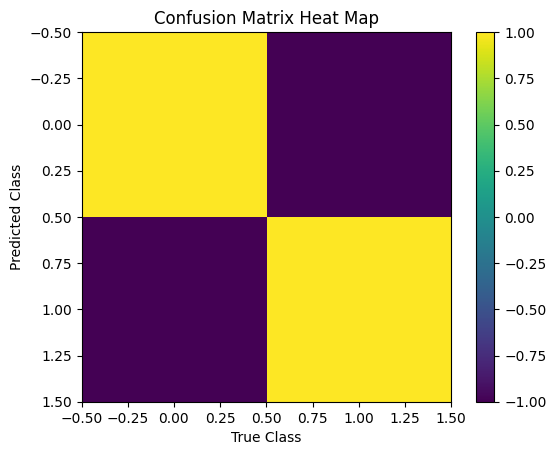

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       246
           1       0.89      0.77      0.83        53

    accuracy                           0.94       299
   macro avg       0.92      0.88      0.90       299
weighted avg       0.94      0.94      0.94       299

specificity: 0.9796747967479674
recall: 0.7735849056603774
precision: 0.8913043478260869
accuracy: 0.9431438127090301


In [38]:
#linear model results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score

y_test_array = np.ravel(y_test)
linear_log_pred = linear_log.predict(X = x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = linear_log_pred)
conf_matrix_scaler = preprocessing.StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)


# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

linear_log_report = classification_report(y_true = y_test, y_pred = linear_log_pred)
print(linear_log_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")


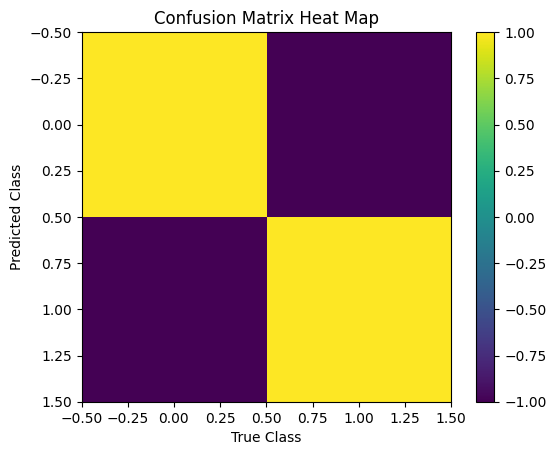

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       246
           1       0.92      0.83      0.87        53

    accuracy                           0.96       299
   macro avg       0.94      0.91      0.92       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.983739837398374
recall: 0.8301886792452831
precision: 0.9166666666666666
accuracy: 0.9565217391304348


In [39]:
#polynomial model results

x_test_mod = x_test[:,1:cols] #removing the ones column from X
X_poly_test = poly.fit_transform(x_test_mod)

poly_log_pred = poly_log.predict(X = X_poly_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = poly_log_pred)
conf_matrix_scaler = preprocessing.StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)


# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

poly_log_report = classification_report(y_true = y_test, y_pred = poly_log_pred)
print(poly_log_report)


#this is to double check everything
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

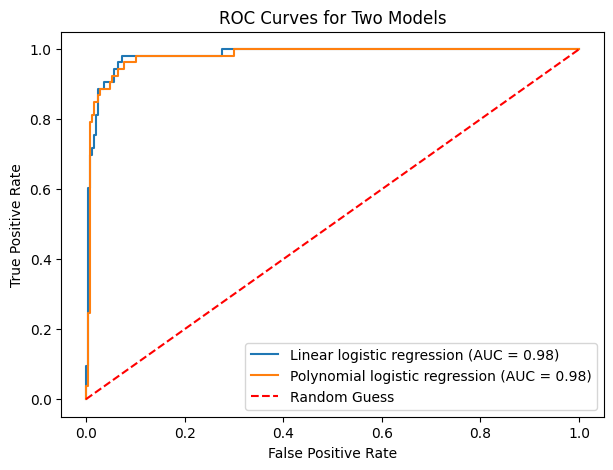

linear logistic regression AOC of ROC: 0.982666053075625
polynomial logistic regression AOC of ROC: 0.9806718821905199


In [40]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
# other option for how things could work

y_pred_linear = linear_log.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_linear)
linear_roc_auc = auc(fpr, tpr)
y_pred_poly = poly_log.predict_proba(X_poly_test)[:, 1]
fpr2, tpr2, _2 = roc_curve(y_test, y_pred_poly)
poly_roc_auc = auc(fpr2, tpr2)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Linear logistic regression (AUC = {linear_roc_auc:.2f})')
plt.plot(fpr2, tpr2, label=f'Polynomial logistic regression (AUC = {poly_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

print(f"linear logistic regression AOC of ROC: {linear_roc_auc}")
print(f"polynomial logistic regression AOC of ROC: {poly_roc_auc}")

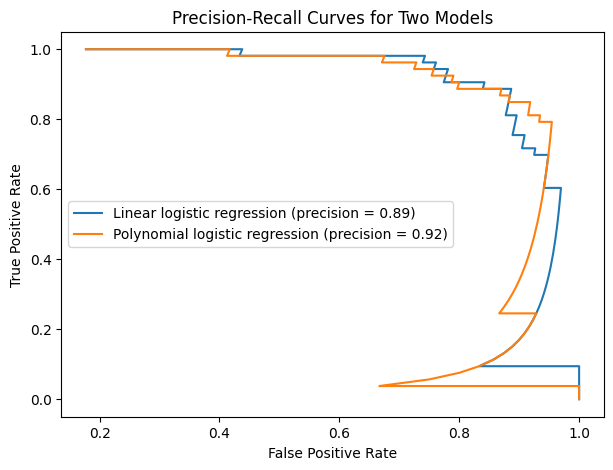

linear logistic regression precision: 0.8913043478260869
polynomial logistic regression precision: 0.9166666666666666


In [44]:
y_pred_linear = linear_log.predict_proba(x_test)[:, 1]
linear_log_pred = linear_log.predict(X = x_test)
fpr, tpr, _ = precision_recall_curve(y_test, y_pred_linear)
linear_precision = precision_score(y_test, linear_log_pred)

y_pred_poly = poly_log.predict_proba(X_poly_test)[:, 1]
poly_log_pred = poly_log.predict(X = X_poly_test)
fpr2, tpr2, _2 = precision_recall_curve(y_test, y_pred_poly)
poly_precision = precision_score(y_test, poly_log_pred)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Linear logistic regression (precision = {linear_precision:.2f})')
plt.plot(fpr2, tpr2, label=f'Polynomial logistic regression (precision = {poly_precision:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Precision-Recall Curves for Two Models')
plt.legend()
plt.show()

print(f"linear logistic regression precision: {linear_precision}")
print(f"polynomial logistic regression precision: {poly_precision}")